In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [132]:
from sklearn.datasets import load_diabetes

In [133]:
diabetes = load_diabetes()

In [134]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [135]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [136]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [137]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Only keep selected features
selected_columns = ['bmi', 'bp', 's2', 's4', 's5', 's6']
X = df[selected_columns]

y = diabetes.target

<Axes: >

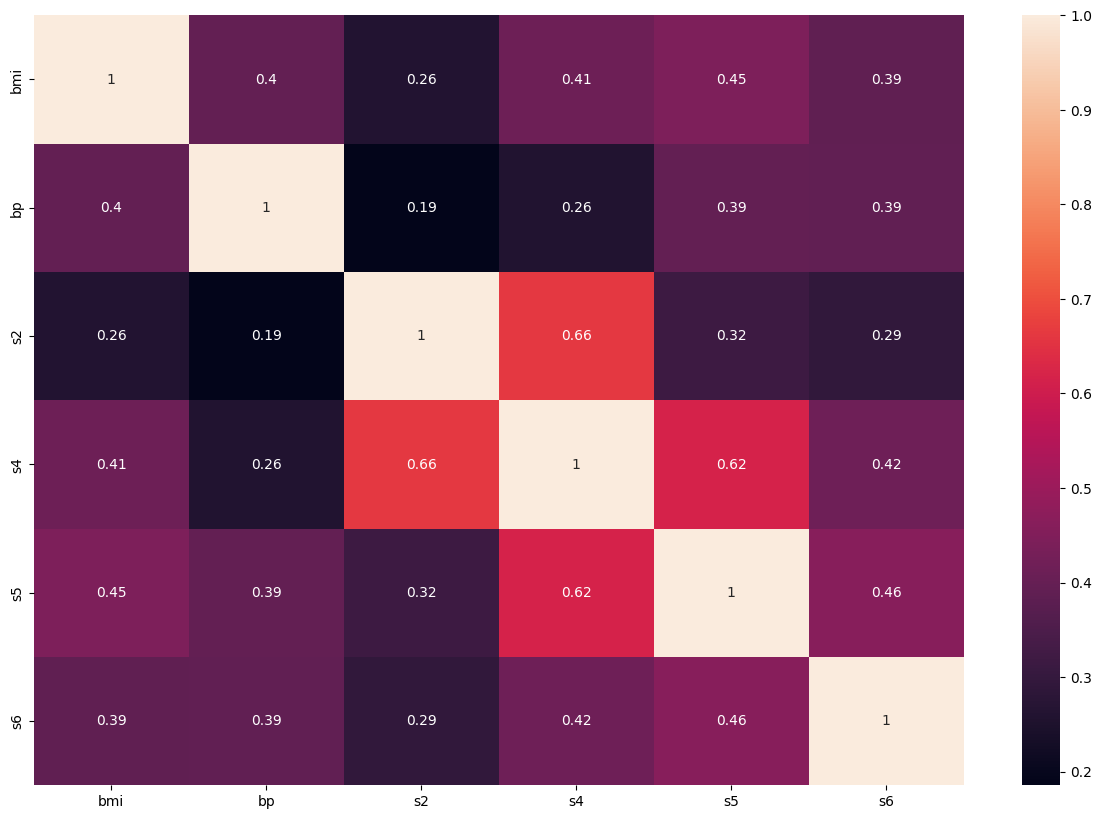

In [138]:
plt.figure(figsize=(15,10))
sns.heatmap(X.corr(), annot=True)

In [139]:
X.corr()

,bmi,bp,s2,s4,s5,s6
bmi,1.000000,0.395411,0.261170,0.413807,0.446157,0.388680
bp,0.395411,1.000000,0.185548,0.257650,0.393480,0.390430
s2,0.261170,0.185548,1.000000,0.659817,0.318357,0.290600
s4,0.413807,0.257650,0.659817,1.000000,0.617859,0.417212
s5,0.446157,0.393480,0.318357,0.617859,1.000000,0.464669
s6,0.388680,0.390430,0.290600,0.417212,0.464669,1.000000


In [140]:
y = diabetes['target']

In [141]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [142]:
## Train test and split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=42)

In [143]:
X_train

,bmi,bp,s2,s4,s5,s6
16,0.042296,0.049415,-0.023861,-0.039493,0.052277,0.027917
408,-0.050396,0.107944,0.019354,0.023608,0.058038,0.040343
432,0.055229,-0.005670,0.044719,0.023239,0.055686,0.106617
316,0.014272,0.001215,-0.021355,0.034309,0.074966,0.040343
3,-0.011595,-0.036656,0.024991,0.034309,0.022688,-0.009362
...,...,...,...,...,...,...
106,-0.076264,-0.043542,-0.034821,-0.039493,-0.059471,-0.083920
270,0.030440,0.083844,-0.047347,-0.039493,0.008641,0.015491
348,-0.020218,-0.005670,-0.029497,-0.039493,-0.010903,-0.001078
435,-0.023451,-0.040099,0.004636,-0.002592,-0.038460,-0.038357


In [144]:
X_train.corr()

,bmi,bp,s2,s4,s5,s6
bmi,1.000000,0.375038,0.257140,0.428866,0.450936,0.389013
bp,0.375038,1.000000,0.161199,0.208703,0.365678,0.375972
s2,0.257140,0.161199,1.000000,0.656085,0.298622,0.272405
s4,0.428866,0.208703,0.656085,1.000000,0.615701,0.419010
s5,0.450936,0.365678,0.298622,0.615701,1.000000,0.456972
s6,0.389013,0.375972,0.272405,0.419010,0.456972,1.000000


In [145]:
from sklearn.tree import DecisionTreeRegressor

In [146]:
regressor = DecisionTreeRegressor()

In [147]:
regressor.fit(X_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [148]:
y_pred = regressor.predict(X_test)

In [149]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [150]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.047215341880710526
55.54054054054054
5268.603603603604


### Hyperparameter Tuning

In [151]:
params = {
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter':['best', 'random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['sqrt', 'log2']
}

In [152]:
from sklearn.model_selection import GridSearchCV

In [153]:
grid = GridSearchCV(regressor,param_grid=params,cv=5,scoring='neg_mean_squared_error')

In [154]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

""" Socho aap shoes kharid rahe ho.
Aap 10 alag size + design try kar rahe ho.

GridSearch kya karta:
	•	Har shoe try karta
	•	Comfort (accuracy) measure karta
	•	Sab scores compare karta
	•	Best wali shoe pick karta

Fit() = shoe try karna
Best params = best shoe choose karna """
## without this cell code we can not find best params and score

' Socho aap shoes kharid rahe ho.\nAap 10 alag size + design try kar rahe ho.\n\nGridSearch kya karta:\n\t•\tHar shoe try karta\n\t•\tComfort (accuracy) measure karta\n\t•\tSab scores compare karta\n\t•\tBest wali shoe pick karta\n\nFit() = shoe try karna\nBest params = best shoe choose karna '

In [155]:
grid.best_params_

{'criterion': 'poisson',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [156]:
grid.best_score_

-3891.3721007302593

In [157]:
y_pred = grid.predict(X_test)

In [158]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.44827342753975374
44.855621920277265
3050.8767989670764


In [161]:
selected_model = DecisionTreeRegressor(criterion='poisson',
 max_depth = 3,
 max_features = 'log2',
 splitter = 'best')

In [164]:
selected_model.fit(X_train,y_train)

,criterion,'poisson'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [165]:
y_pred = selected_model.predict(X_test)

In [166]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.3279229243595271
48.09835300179386
3716.377748575631


[Text(0.5, 0.875, 'x[0] <= 0.005\npoisson = 19.89\nsamples = 331\nvalue = 154.344'),
 Text(0.25, 0.625, 'x[1] <= 0.027\npoisson = 15.034\nsamples = 197\nvalue = 119.787'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[0] <= -0.007\npoisson = 12.485\nsamples = 160\nvalue = 109.738'),
 Text(0.0625, 0.125, 'poisson = 10.913\nsamples = 135\nvalue = 104.037'),
 Text(0.1875, 0.125, 'poisson = 16.203\nsamples = 25\nvalue = 140.52'),
 Text(0.375, 0.375, 'x[3] <= 0.064\npoisson = 17.107\nsamples = 37\nvalue = 163.243'),
 Text(0.3125, 0.125, 'poisson = 16.327\nsamples = 30\nvalue = 147.8'),
 Text(0.4375, 0.125, 'poisson = 5.313\nsamples = 7\nvalue = 229.429'),
 Text(0.75, 0.625, 'x[1] <= 0.024\npoisson = 13.292\nsamples = 134\nvalue = 205.149'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[5] <= 0.042\npoisson = 13.551\nsamples = 70\nvalue = 179.9'),
 Text(0.5625, 0.125, 'poisson = 12.424\nsamples = 56\nvalue = 167.429'),
 Text(0.6875, 0.125, 'poisson = 9.937\nsamples = 14\nvalue

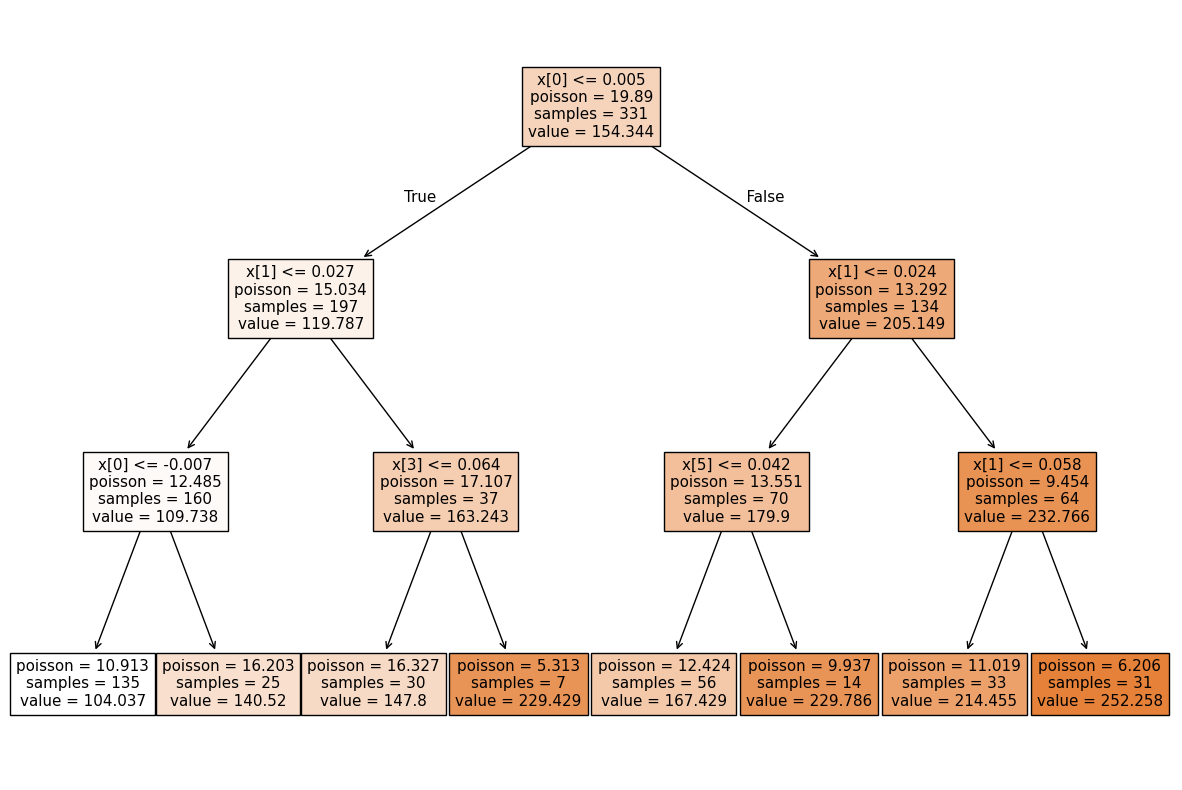

In [169]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(selected_model,filled=True)

📉 Why performance low hai? (Very Important)

✔ Decision Tree ka biggest problem:
	•	Overfit bahut jaldi ho jata hai
	•	Continuous data par stable nahi hota
	•	Diabetes dataset high noise aur complex relationships wala dataset hai

✔ Features kam hain (only 6 selected)
	•	Important interactions missing hain

✔ Tree depth ka tuning nahi hua
	•	Default tree kabhi underfit, kabhi overfit ho jata hai

⸻

⭐ How to improve your model (Guaranteed better results)

✔ 1. Hyperparameter tuning:

Try:
max_depth
min_samples_split
min_samples_leaf
criterion = 'squared_error'
max_depth
min_samples_split
min_samples_leaf
criterion = 'squared_error'
✔ 2. Use Random Forest (much better)

RandomForestRegressor yahan R² = 0.45–0.55 easily de deta hai.

✔ 3. Try Gradient Boosting Models
	•	XGBoost
	•	LightGBM
	•	CatBoost
Ye dataset par sabse best perform karte hain.